# Author - Deepak Kumar Singh
# Task 1: Predictions using Supervised Machine Learning
# THE SPARKS FOUNDATION (GRIP): DATA SCIENCE AND BUSINESS ANALYTICS
In this task we will try to predict the score of the student for the hours of study by constructing the simple linear regression model.

In [179]:
#importing necesary libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# step1 
Updating the data 

In [180]:
filename=("sdata.csv")

In [181]:
df=pd.read_csv(filename)

In [182]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratory DATA Analysis

In [183]:
#Shape of dataset given
df.shape

(25, 2)

In [184]:
#columns in a dataset given
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [186]:
#statistical analysis of dataframe given
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Step 2
Plotting data in 2D to find any relationship between the data 

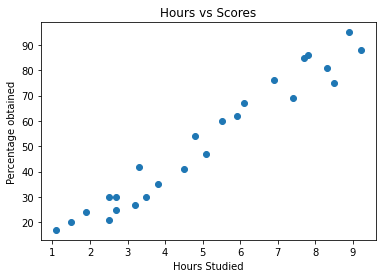

In [187]:
#Plotting the distribution of scores 
plt.scatter(x='Hours',y='Scores',data=df)
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage obtained')
plt.show()

It could easily be seen that the above graph is a positive linear relation between the number of hours studied and percentage of score

[]

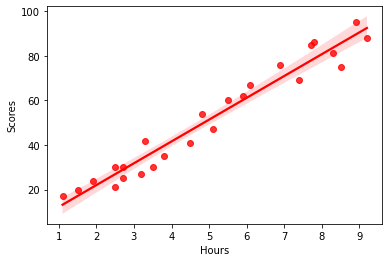

In [188]:
sns.regplot(data=df,x='Hours',y='Scores',color='Red')
plt.plot(grid=True)

In [189]:
df['Scores']=df['Scores'].astype(float)

# Data Preprocessing

In [190]:
X=df['Hours']
y=df['Scores']

# Step 3 
# Splitting this data into training and tests using Scikit-Learn's built in train_test_split() method

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [192]:
X_train

24    7.8
23    6.9
14    1.1
1     5.1
10    7.7
13    3.3
8     8.3
6     9.2
18    6.1
4     3.5
9     2.7
7     5.5
20    2.7
3     8.5
0     2.5
21    4.8
15    8.9
12    4.5
Name: Hours, dtype: float64

In [193]:
y_train

24    86.0
23    76.0
14    17.0
1     47.0
10    85.0
13    42.0
8     81.0
6     88.0
18    67.0
4     30.0
9     25.0
7     60.0
20    30.0
3     75.0
0     21.0
21    54.0
15    95.0
12    41.0
Name: Scores, dtype: float64

In [194]:
y_test

5     20.0
2     27.0
19    69.0
16    30.0
11    62.0
22    35.0
17    24.0
Name: Scores, dtype: float64

In [195]:
X_test

5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9
Name: Hours, dtype: float64

# Step 5 
# Training the data set using linear regression algorithm 

In [196]:
from sklearn.linear_model import LinearRegression

In [197]:
model=LinearRegression()

In [198]:
model.fit(np.array(X_train).reshape(-1,1),y_train)


LinearRegression()

Modeling Complete

# Plotting the Linear Regression line

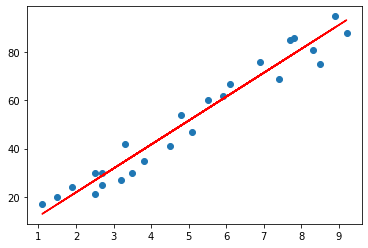

In [200]:
y_hat= model.coef_*X+model.intercept_

#Plotting for the test data
plt.scatter(X,y)
plt.plot(X, y_hat, color='red');
plt.show()

# Testing the Model

In [201]:
test_p=model.predict(np.array(X_test).reshape(-1,1))
test_p

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [202]:
df=pd.DataFrame({'Actual':y_test,'Predicted':test_p})
df

,Actual,Predicted
5,20.0,16.844722
2,27.0,33.745575
19,69.0,75.500624
16,30.0,26.786400
11,62.0,60.588106
22,35.0,39.710582
17,24.0,20.821393


# Step 6
Actual plot vs Predicted Plot

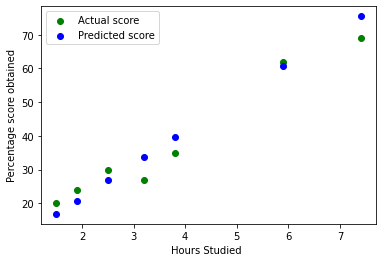

In [206]:

#Ploting for the test data
plt.scatter(X_test,y_test,color='green') #actual dataset plot
plt.scatter(X_test,test_p,color='blue') #Predicted data plot
plt.legend(["Actual score ","Predicted score"])
plt.xlabel('Hours Studied ')
plt.ylabel('Percentage score obtained')
plt.show()

# Evaluating the performance of the model

In [147]:
from sklearn import metrics

In [148]:
mean_absolute_error(y_test,test_predictions)

4.130879918502482

In [207]:
np.sqrt(metrics.mean_squared_error(y_test,test_predictions))

4.509204328368805

# Testing of scores for 9.25 hours of study

In [208]:
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
predictions=model.predict(test)
print("Number of Hours Studied ={}".format(hours))
print("Predicted Score ={}".format(predictions[0]))

Number of Hours Studied =9.25
Predicted Score =93.89272889341652


# Conclusion

In [ ]:
1. We have constructed a simple linear regression model of the student for the given hours of study to predict score.
2. We got very less mean absolute error and root mean squared error which implies our constructed model is accurate .
3. We got 93.89 score for the 9.25 hours of study.